In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

print(movies.columns)
print(credits.columns)

# Merging the 2 datasets
credits.rename(columns={'movie_id': 'id'}, inplace=True)
df = movies.merge(credits, on='id')

df.to_csv('movies_merged.csv', index=False)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [45]:
# Checking if 'title' is the same in both initial dataframes:

print(f'Columns: {df.columns}')
print((df['title_x'] == df['title_y']).all())

Columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')
True


In [48]:
# They are, so we remove 'title_y'

df = df.drop(columns=['title_y']).rename(columns={'title_x': 'title'})

In [49]:
# looking at basic properties of the dataset

print(f'Columns: {df.columns}')
print(df.describe())
print(df.info())

Columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')
             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800

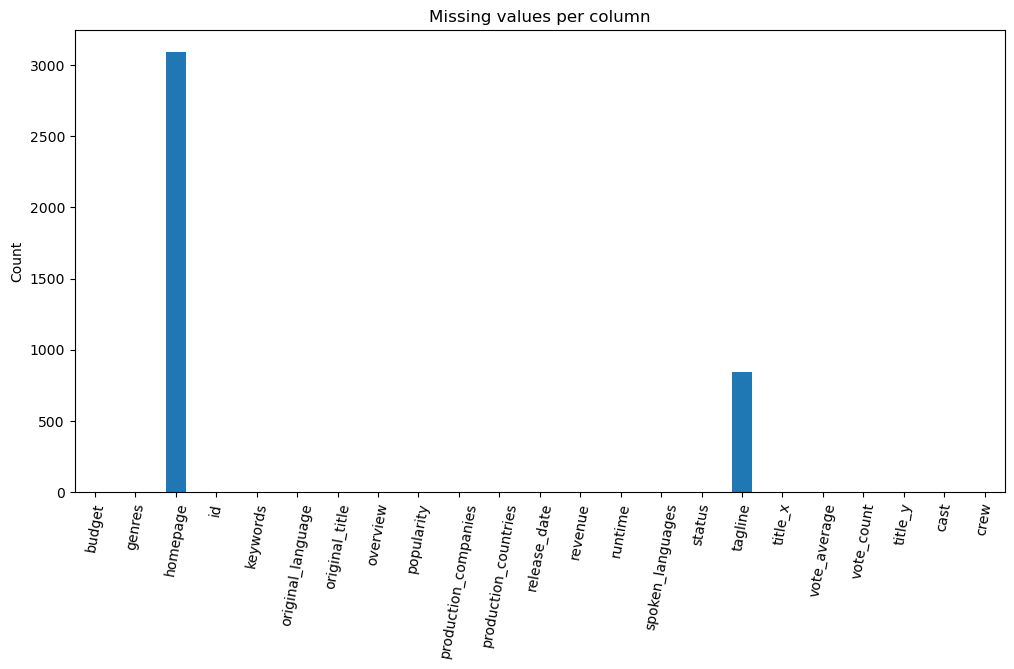

In [31]:
# Missing values

plt.figure(figsize=(12,6))
df.isnull().sum().plot(kind="bar")
plt.title("Missing values per column")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

We observe there are missing values in some columns, mostly in "homepage" and 'tagline'.

In [28]:
print(f'Number of movies with no budget: {(df["budget"] == 0).sum()}\nNumber of movies with no revenue: {(df["revenue"] == 0).sum()}')


Number of movies with no budget: 1037
Number of movies with no revenue: 1427


In [50]:
print(df[(df["budget"]==0) & (df["revenue"]!=0)].title)

321                               The Campaign
359     Alvin and the Chipmunks: The Road Chip
409                              All That Jazz
475                                   The Edge
489                                     Oceans
                         ...                  
4605                                  Dogtooth
4630                                Compliance
4677                                     Three
4766                            The Last Waltz
4775                               Funny Ha Ha
Name: title, Length: 147, dtype: object


We find some movies that have no budget but still have revenue: they could be just interesting quirks, but checking 'Alvin and the Chipmunks: The Road Chip' on Wikipedia quickly gives the real budget of the movie: $90 million. There must be missing data about some of the movies' budgets that was replaced with zeros. For further analysis, we will treat 0 in revenue/budget as missing data. It is one data quality issue we stumble upon at the exploration stage already.

In [56]:
# Checking the time period the data comes from

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print(df['release_date'].min(), df['release_date'].max())

1916-09-04 00:00:00 2017-02-03 00:00:00
